In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from matplotlib import cycler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.dates as dates
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

plt.style.use('fivethirtyeight')

colors = ['#16b713','#1A8FE3','#38369A','#9810B3','#D11149','#FF6201','#f3ba07']
plt.rc('axes',prop_cycle=cycler('color',colors))

In [70]:
df = pd.read_csv('../data/cleaned.csv')

/var/folders/gm/phwm98352tj19cnh_y_nt3n80000gn/T/ipykernel_50457/1898347098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


Cluster 0
Mean word score results: 1.6004868111038284
Mean average number of guesses: 3.7615789473684225
Mean word occuraence: 0.02739264257086536


Cluster 1
Mean word score results: 1.348062712279306
Mean average number of guesses: 4.156647727272727
Mean word occuraence: 0.012115481664328671


Cluster 2
Mean word score results: 1.3261015574798811
Mean average number of guesses: 4.72875
Mean word occuraence: 0.005450028919988113




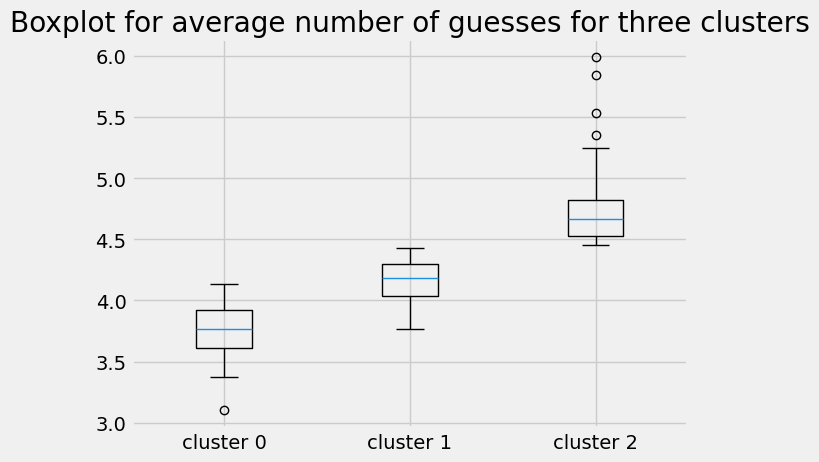

In [143]:
df_kmeans = df[['word_score', 'avg_num_guesses', 'word_occurrence']]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3,n_init=10,random_state=42).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.xticks(range(1,4),labels=[f'cluster {str(i)}' for i in range(3)])
plt.title('Boxplot for average number of guesses for three clusters')
plt.show()

In [123]:
difficulty = {0:'easy',1:'medium',2:'hard'}
df['difficulty'] = labels
df['difficulty'] = df.difficulty.apply(lambda x: difficulty[x])

In [124]:
df

,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter4_int,letter5_int,avg_num_guesses,day_of_week,word_score,word_occurrence,vowels,repeats,difficulty_num,difficulty
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,13,16,4.13,4,1.270683,0.000419,1,0,1,medium
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,14,11,4.22,5,1.300505,0.001037,1,0,1,medium
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,7,5,4.64,6,1.421003,0.001064,2,1,2,hard
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,18,25,4.43,0,1.187546,0.003178,2,0,1,medium
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,14,11,3.77,1,1.148502,0.014598,1,0,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,4,15,4.45,1,1.271154,0.000276,2,1,2,hard
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,5,12,4.15,2,1.377718,0.000204,2,0,1,medium
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,15,3,4.40,3,1.169976,0.000796,2,0,1,medium
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,1,18,4.14,4,1.564995,0.001400,2,0,1,medium


In [139]:
X = df[['word_score','word_occurrence','vowels','repeats']]
y = df['difficulty']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
accuracy = sum(cm[i][i] for i in range(3)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

              precision    recall  f1-score   support

        easy       0.82      0.50      0.62        18
        hard       0.71      0.36      0.48        14
      medium       0.58      0.95      0.72        22

    accuracy                           0.65        54
   macro avg       0.71      0.60      0.61        54
weighted avg       0.70      0.65      0.63        54

accuracy = 0.6481481481481481


[]

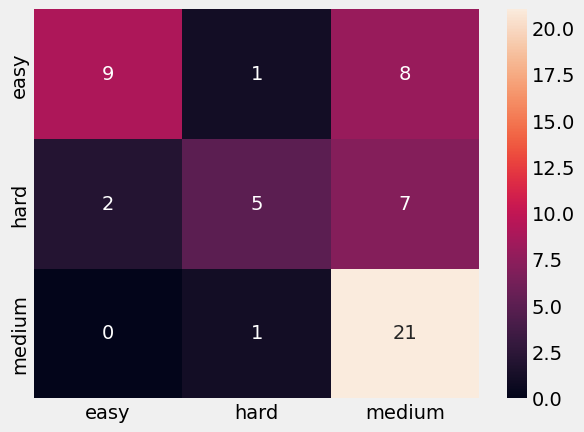

In [140]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
labels=['easy','hard','medium']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.plot()

In [141]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier(n_estimators = 1000, criterion='entropy',max_depth=4,random_state=42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
accuracy = sum(cm[i][i] for i in range(3)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

              precision    recall  f1-score   support

        easy       0.73      0.44      0.55        18
        hard       0.83      0.36      0.50        14
      medium       0.57      0.95      0.71        22

    accuracy                           0.63        54
   macro avg       0.71      0.59      0.59        54
weighted avg       0.69      0.63      0.60        54

accuracy = 0.6296296296296297


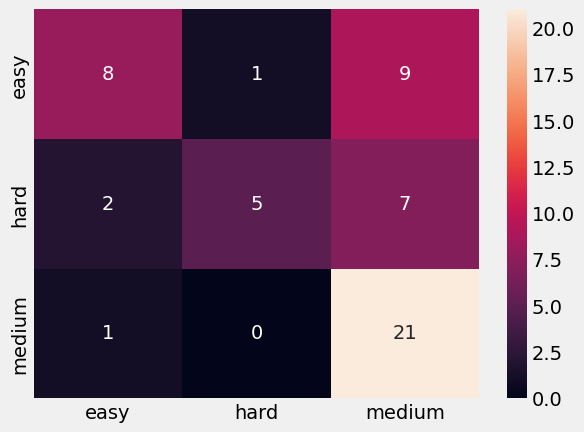

In [142]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
labels=['easy','hard','medium']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()